# EDA

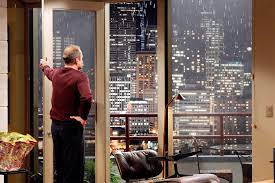

In [926]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [927]:

# as column 'condition' is truncated in the display, disable column truncation
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', -1)

#### Checking the data

In [928]:
# Create DataFrame 
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [929]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count 21597.000      21597.000   21597.000 21597.000  21597.000      
mean  4580474287.771 540296.574  3.373     2.116      2080.322       
std   2876735715.748 367368.140  0.926     0.769      918.106        
min   1000102.000    78000.000   1.000     0.500      370.000        
25%   2123049175.000 322000.000  3.000     1.750      1430.000       
50%   3904930410.000 450000.000  3.000     2.250      1910.000       
75%   7308900490.000 645000.000  4.000     2.500      2550.000       
max   9900000190.000 7700000.000 33.000    8.000      13540.000      

         sqft_lot    floors  waterfront      view  condition     grade  \
count 21597.000   21597.000 19221.000   21534.000 21597.000  21597.000   
mean  15099.409   1.494     0.008       0.234     3.410      7.658       
std   41412.637   0.540     0.087       0.766     0.651      1.173       
min   520.000     1.000     0.000       0.000     1.000      3.000       
25%   5040.000    1.000     0.000       0.000     3.000      7.000       
50%   7618.000    1.500     0.000       0.000     3.000      7.000       
75%   10685.000   2.000     0.000       0.000     4.000      8.000       
max   1651359.000 3.500     1.000       4.000     5.000      13.000      

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count 21597.000   21597.000 17755.000     21597.000 21597.000 21597.000   
mean  1788.597    1971.000  83.637        98077.952 47.560    -122.214    
std   827.760     29.375    399.946       53.513    0.139     0.141       
min   370.000     1900.000  0.000         98001.000 47.156    -122.519    
25%   1190.000    1951.000  0.000         98033.000 47.471    -122.328    
50%   1560.000    1975.000  0.000         98065.000 47.572    -122.231    
75%   2210.000    1997.000  0.000         98118.000 47.678    -122.125    
max   9410.000    2015.000  2015.000      98199.000 47.778    -121.315    

       sqft_living15  sqft_lot15  
count 21597.000      21597.000    
mean  1986.620       12758.284    
std   685.230        27274.442    
min   399.000        651.000      
25%   1490.000       5100.000     
50%   1840.000       7620.000     
75%   2360.000       10083.000    
max   6210.000       871200.000

In [930]:
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000  3        1.000       1180          
1  6414100192  12/9/2014  538000.000  3        2.250       2570          
2  5631500400  2/25/2015  180000.000  2        1.000       770           
3  2487200875  12/9/2014  604000.000  4        3.000       1960          
4  1954400510  2/18/2015  510000.000  3        2.000       1680          

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0  5650     1.000   NaN         0.000  3          7      1180         
1  7242     2.000   0.000       0.000  3          7      2170         
2  10000    1.000   0.000       0.000  3          6      770          
3  5000     1.000   0.000       0.000  5          7      1050         
4  8080     1.000   0.000       0.000  3          8      1680         

  sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0  0.0           1955     0.000          98178   47.511 -122.257   
1  400.0         1951     1991.000       98125   47.721 -122.319   
2  0.0           1933     NaN            98028   47.738 -122.233   
3  910.0         1965     0.000          98136   47.521 -122.393   
4  0.0           1987     0.000          98074   47.617 -122.045   

   sqft_living15  sqft_lot15  
0  1340           5650        
1  1690           7639        
2  2720           8062        
3  1360           5000        
4  1800           7503

In [931]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [932]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [933]:
df.isnull()

id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False  False     False      False        False      
1      False  False  False  False     False      False        False      
2      False  False  False  False     False      False        False      
3      False  False  False  False     False      False        False      
4      False  False  False  False     False      False        False      
...      ...    ...    ...    ...       ...        ...          ...      
21592  False  False  False  False     False      False        False      
21593  False  False  False  False     False      False        False      
21594  False  False  False  False     False      False        False      
21595  False  False  False  False     False      False        False      
21596  False  False  False  False     False      False        False      

       floors  waterfront   view  condition  grade  sqft_above  sqft_basement  \
0      False   True        False  False      False  False       False           
1      False   False       False  False      False  False       False           
2      False   False       False  False      False  False       False           
3      False   False       False  False      False  False       False           
4      False   False       False  False      False  False       False           
...      ...     ...         ...    ...        ...    ...         ...           
21592  False   False       False  False      False  False       False           
21593  False   False       False  False      False  False       False           
21594  False   False       False  False      False  False       False           
21595  False   True        False  False      False  False       False           
21596  False   False       False  False      False  False       False           

       yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
0      False     False         False    False  False  False           
1      False     False         False    False  False  False           
2      False     True          False    False  False  False           
3      False     False         False    False  False  False           
4      False     False         False    False  False  False           
...      ...       ...           ...      ...    ...    ...           
21592  False     False         False    False  False  False           
21593  False     False         False    False  False  False           
21594  False     False         False    False  False  False           
21595  False     False         False    False  False  False           
21596  False     False         False    False  False  False           

       sqft_lot15  
0      False       
1      False       
2      False       
3      False       
4      False       
...      ...       
21592  False       
21593  False       
21594  False       
21595  False       
21596  False       

[21597 rows x 21 columns]

In [934]:
# check how many duplicated rows exist in the data frame
df.duplicated().value_counts()
# no duplicates

False    21597
dtype: int64

##### My Hypothoses:

1. 
* The more sqft_living a house has, the more expensive it is.
* The more rooms a house has the more expensive it is.
    * Combine the last two Hypotheses. Can we find big houses with few rooms to renovate and sell with small profit?
<br>
2.
* The sale price increases with the proximity to the city center.
    * How far or near can we find cheap houses for families? Can't be rural because of work and school -> has to be minimum in suburbs.
<br>
3.
* Homes in a neighbourhood of people with a migration background are cheaper. (e.g Chinatown in Seattle)
<br>

##### Cleaning Data

Because column price is the most important regarding the stakeholders interest in buying cheap, first create a variable price/sqft_living to determine if a house is sold below, at or above average. Save in DataFrame. (Show before and after filtering.)
<br>
* Make a plot for column price_per_sqft. (Detect witch average to use for further filtering: Mean, Mode or Median?)
<br>
* Filter the DataFrame: Save in DataFrame that only houses with price_per_sqft below or equal to average are in. 
<br>


Price per sqft is missing in dataset. Make new column: price_per_sqft

In [935]:
# Calculate price per sqft_living per house:
price_per_sqft_series= df['price']/df['sqft_living']
price_per_sqft_series.name = 'price_per_sqft'
df = pd.concat([df, price_per_sqft_series], axis=1)
df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014 221900.000  3        1.000       1180          
1  6414100192  12/9/2014  538000.000  3        2.250       2570          
2  5631500400  2/25/2015  180000.000  2        1.000       770           
3  2487200875  12/9/2014  604000.000  4        3.000       1960          
4  1954400510  2/18/2015  510000.000  3        2.000       1680          

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0  5650     1.000   NaN         0.000  3          7      1180         
1  7242     2.000   0.000       0.000  3          7      2170         
2  10000    1.000   0.000       0.000  3          6      770          
3  5000     1.000   0.000       0.000  5          7      1050         
4  8080     1.000   0.000       0.000  3          8      1680         

  sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0  0.0           1955     0.000          98178   47.511 -122.257   
1  400.0         1951     1991.000       98125   47.721 -122.319   
2  0.0           1933     NaN            98028   47.738 -122.233   
3  910.0         1965     0.000          98136   47.521 -122.393   
4  0.0           1987     0.000          98074   47.617 -122.045   

   sqft_living15  sqft_lot15  price_per_sqft  
0  1340           5650       188.051          
1  1690           7639       209.339          
2  2720           8062       233.766          
3  1360           5000       308.163          
4  1800           7503       303.571

In [936]:
df['price_per_sqft'].describe()

count   21597.000
mean    264.143  
std     110.000  
min     87.588   
25%     182.292  
50%     244.645  
75%     318.333  
max     810.139  
Name: price_per_sqft, dtype: float64

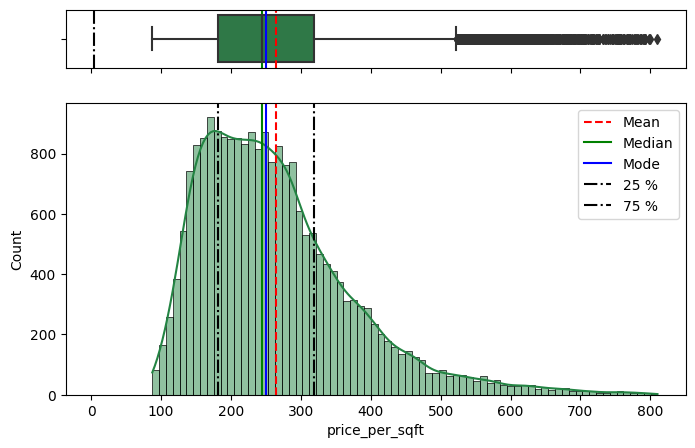

In [937]:
# Boxplot and Histogram for 'price-per_sqft' with mean, median, mode and percentile displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['price_per_sqft'].mean()
median=df['price_per_sqft'].median()
mode=df['price_per_sqft'].mode().values[0]
cutoff1=df['price_per_sqft'].quantile(0.25)
cutoff2=df['price_per_sqft'].quantile(0.75)

sns.boxplot(data=df, x="price_per_sqft", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle='-.')

sns.histplot(data=df, x="price_per_sqft", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff1, color='black', linestyle='-.', label="25 %")
ax_hist.axvline(cutoff2, color='black', linestyle='-.', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()


# Positively skewed graph: use median instead of mean for average.

Is there a correlation between price and price per sqft and bedrooms? Check hypothesis: The more rooms the higher the price.

In [938]:
# correlation between price_per_sqft and bedrooms:
corr = df['bedrooms'].corr(df['price'])
print(corr.round(1))

# correlation is moderate

0.3


In [939]:
corr = df['sqft_living'].corr(df['price'])
print(corr.round(1))

# more sqft_living higher price, but price rises quicker in correlation to sqft_living

0.7


In [940]:
corr = df['sqft_living'].corr(df['bedrooms'])
print(corr.round(1))

0.6


In [941]:
# inspect bedrooms data
df['bedrooms'].describe()

count   21597.000
mean    3.373    
std     0.926    
min     1.000    
25%     3.000    
50%     3.000    
75%     4.000    
max     33.000   
Name: bedrooms, dtype: float64

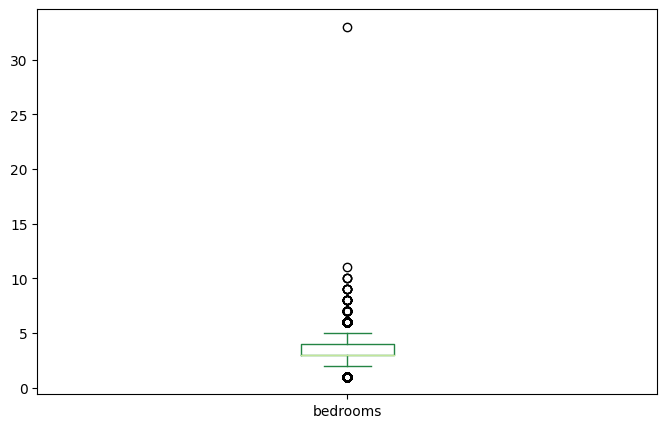

In [942]:
# make boxplot to show outliers for bedrooms:
df['bedrooms'].plot(kind='box');

In [943]:
# make scatterplot with cutoff at 5 and show correlation:
fig = px.scatter(df.query('bedrooms < 6'), x='price', y='sqft_living', color='bedrooms', hover_data=['bedrooms'])
fig.show()

In [944]:
# make scatterplot with cutoff at 5 and show correlation:
fig = px.scatter(df.query('bedrooms < 6'), x='price', y='price_per_sqft', color='bedrooms', hover_data=['bedrooms'])
fig.show()

There is a strong correlation between the price and the number of rooms. But the correlation between price per sqft and room is not as strong -> weak correlation.

What happens if I filter the dataframe that only houses below median will be shown?

In [945]:
# return median of price
price_median = df['price'].median()
print(price_median)

450000.0


In [946]:
# series for df of price lower than median price:
price_below_median = df['price'] < price_median
#print(price_below_median)

# change name of series for column name:
price_below_median.name = 'price_below_median'

# merge for new column:
df = df.join(price_below_median, how='inner')
df

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014 221900.000  3        1.000       1180          
1      6414100192  12/9/2014  538000.000  3        2.250       2570          
2      5631500400  2/25/2015  180000.000  2        1.000       770           
3      2487200875  12/9/2014  604000.000  4        3.000       1960          
4      1954400510  2/18/2015  510000.000  3        2.000       1680          
...           ...        ...         ... ..          ...        ...          
21592  263000018   5/21/2014  360000.000  3        2.500       1530          
21593  6600060120  2/23/2015  400000.000  4        2.500       2310          
21594  1523300141  6/23/2014  402101.000  2        0.750       1020          
21595  291310100   1/16/2015  400000.000  3        2.500       1600          
21596  1523300157  10/15/2014 325000.000  2        0.750       1020          

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.000   NaN         0.000  3          7      1180         
1      7242     2.000   0.000       0.000  3          7      2170         
2      10000    1.000   0.000       0.000  3          6      770          
3      5000     1.000   0.000       0.000  5          7      1050         
4      8080     1.000   0.000       0.000  3          8      1680         
...     ...       ...     ...         ... ..         ..       ...         
21592  1131     3.000   0.000       0.000  3          8      1530         
21593  5813     2.000   0.000       0.000  3          8      2310         
21594  1350     2.000   0.000       0.000  3          7      1020         
21595  2388     2.000   NaN         0.000  3          8      1600         
21596  1076     2.000   0.000       0.000  3          7      1020         

      sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0      0.0           1955     0.000          98178   47.511 -122.257   
1      400.0         1951     1991.000       98125   47.721 -122.319   
2      0.0           1933     NaN            98028   47.738 -122.233   
3      910.0         1965     0.000          98136   47.521 -122.393   
4      0.0           1987     0.000          98074   47.617 -122.045   
...    ...            ...       ...            ...      ...      ...   
21592  0.0           2009     0.000          98103   47.699 -122.346   
21593  0.0           2014     0.000          98146   47.511 -122.362   
21594  0.0           2009     0.000          98144   47.594 -122.299   
21595  0.0           2004     0.000          98027   47.535 -122.069   
21596  0.0           2008     0.000          98144   47.594 -122.299   

       sqft_living15  sqft_lot15  price_per_sqft  price_below_median  
0      1340           5650       188.051          True                
1      1690           7639       209.339          False               
2      2720           8062       233.766          True                
3      1360           5000       308.163          False               
4      1800           7503       303.571          False               
...     ...            ...           ...            ...               
21592  1530           1509       235.294          True                
21593  1830           7200       173.160          True                
21594  1020           2007       394.217          True                
21595  1410           1287       250.000          True                
21596  1020           1357       318.627          True                

[21597 rows x 23 columns]

In [947]:
df

id        date      price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014 221900.000  3        1.000       1180          
1      6414100192  12/9/2014  538000.000  3        2.250       2570          
2      5631500400  2/25/2015  180000.000  2        1.000       770           
3      2487200875  12/9/2014  604000.000  4        3.000       1960          
4      1954400510  2/18/2015  510000.000  3        2.000       1680          
...           ...        ...         ... ..          ...        ...          
21592  263000018   5/21/2014  360000.000  3        2.500       1530          
21593  6600060120  2/23/2015  400000.000  4        2.500       2310          
21594  1523300141  6/23/2014  402101.000  2        0.750       1020          
21595  291310100   1/16/2015  400000.000  3        2.500       1600          
21596  1523300157  10/15/2014 325000.000  2        0.750       1020          

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.000   NaN         0.000  3          7      1180         
1      7242     2.000   0.000       0.000  3          7      2170         
2      10000    1.000   0.000       0.000  3          6      770          
3      5000     1.000   0.000       0.000  5          7      1050         
4      8080     1.000   0.000       0.000  3          8      1680         
...     ...       ...     ...         ... ..         ..       ...         
21592  1131     3.000   0.000       0.000  3          8      1530         
21593  5813     2.000   0.000       0.000  3          8      2310         
21594  1350     2.000   0.000       0.000  3          7      1020         
21595  2388     2.000   NaN         0.000  3          8      1600         
21596  1076     2.000   0.000       0.000  3          7      1020         

      sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0      0.0           1955     0.000          98178   47.511 -122.257   
1      400.0         1951     1991.000       98125   47.721 -122.319   
2      0.0           1933     NaN            98028   47.738 -122.233   
3      910.0         1965     0.000          98136   47.521 -122.393   
4      0.0           1987     0.000          98074   47.617 -122.045   
...    ...            ...       ...            ...      ...      ...   
21592  0.0           2009     0.000          98103   47.699 -122.346   
21593  0.0           2014     0.000          98146   47.511 -122.362   
21594  0.0           2009     0.000          98144   47.594 -122.299   
21595  0.0           2004     0.000          98027   47.535 -122.069   
21596  0.0           2008     0.000          98144   47.594 -122.299   

       sqft_living15  sqft_lot15  price_per_sqft  price_below_median  
0      1340           5650       188.051          True                
1      1690           7639       209.339          False               
2      2720           8062       233.766          True                
3      1360           5000       308.163          False               
4      1800           7503       303.571          False               
...     ...            ...           ...            ...               
21592  1530           1509       235.294          True                
21593  1830           7200       173.160          True                
21594  1020           2007       394.217          True                
21595  1410           1287       250.000          True                
21596  1020           1357       318.627          True                

[21597 rows x 23 columns]

In [948]:
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count 21597.000      21597.000   21597.000 21597.000  21597.000      
mean  4580474287.771 540296.574  3.373     2.116      2080.322       
std   2876735715.748 367368.140  0.926     0.769      918.106        
min   1000102.000    78000.000   1.000     0.500      370.000        
25%   2123049175.000 322000.000  3.000     1.750      1430.000       
50%   3904930410.000 450000.000  3.000     2.250      1910.000       
75%   7308900490.000 645000.000  4.000     2.500      2550.000       
max   9900000190.000 7700000.000 33.000    8.000      13540.000      

         sqft_lot    floors  waterfront      view  condition     grade  \
count 21597.000   21597.000 19221.000   21534.000 21597.000  21597.000   
mean  15099.409   1.494     0.008       0.234     3.410      7.658       
std   41412.637   0.540     0.087       0.766     0.651      1.173       
min   520.000     1.000     0.000       0.000     1.000      3.000       
25%   5040.000    1.000     0.000       0.000     3.000      7.000       
50%   7618.000    1.500     0.000       0.000     3.000      7.000       
75%   10685.000   2.000     0.000       0.000     4.000      8.000       
max   1651359.000 3.500     1.000       4.000     5.000      13.000      

       sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
count 21597.000   21597.000 17755.000     21597.000 21597.000 21597.000   
mean  1788.597    1971.000  83.637        98077.952 47.560    -122.214    
std   827.760     29.375    399.946       53.513    0.139     0.141       
min   370.000     1900.000  0.000         98001.000 47.156    -122.519    
25%   1190.000    1951.000  0.000         98033.000 47.471    -122.328    
50%   1560.000    1975.000  0.000         98065.000 47.572    -122.231    
75%   2210.000    1997.000  0.000         98118.000 47.678    -122.125    
max   9410.000    2015.000  2015.000      98199.000 47.778    -121.315    

       sqft_living15  sqft_lot15  price_per_sqft  
count 21597.000      21597.000   21597.000        
mean  1986.620       12758.284   264.143          
std   685.230        27274.442   110.000          
min   399.000        651.000     87.588           
25%   1490.000       5100.000    182.292          
50%   1840.000       7620.000    244.645          
75%   2360.000       10083.000   318.333          
max   6210.000       871200.000  810.139

In [949]:
# scatterplot for price (filter: only show house when price below median), sqft_living and bedrooms:
fig = px.scatter(df.query('bedrooms < 6 and price_below_median == True '), x='price', y='sqft_living', color='bedrooms', hover_data=['bedrooms'])
fig.show()

In [950]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [951]:
# make scatterplot with cutoff at 5 and show correlation:
fig = px.scatter(df, x='zipcode', y='price_per_sqft', color='zipcode', hover_data=['bedrooms'])
fig.show()

In [952]:
#gropby('zipcode').price.mean() in column speichern und dann df danach filtern und in obigen scatterplot einbauen: neuen machen
zipcode_price_median = df.groupby('zipcode').median()['price_per_sqft']
zipcode_price_median.name = 'zip_price_median'
df = df.merge(zipcode_price_median, on='zipcode')

In [953]:
# make scatterplot with cutoff at 5 and show correlation:
fig = px.scatter(df.query('bedrooms < 6 and zip_price_median'), x='price', y='sqft_living', color='bedrooms', hover_data=['bedrooms'])
fig.show()

##### Start dropping columns

Start dropping columns if correlation between columns and column 'price_per_sqft' is weak (0.2) or moderate (0.3).
<br>
Drop it like it's hot...
<br>

In [954]:
# Drop the ID column: won't need it for merging
df = df.drop('id', axis=1)
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014 221900.000  3        1.000       1180         5650     1.000     
1  6/23/2014  205425.000  2        1.000       880          6780     1.000     
2  7/17/2014  445000.000  3        2.250       2100         8201     1.000     
3  9/25/2014  236000.000  3        1.000       1300         5898     1.000     
4  2/27/2015  170000.000  2        1.000       860          5265     1.000     

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0 NaN         0.000  3          7      1180        0.0           1955       
1 0.000       0.000  4          6      880         0.0           1945       
2 NaN         2.000  3          8      1620        480.0         1967       
3 NaN         0.000  3          7      1300        0.0           1961       
4 0.000       0.000  3          6      860         0.0           1931       

   yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0 0.000          98178   47.511 -122.257  1340           5650         
1 0.000          98178   47.501 -122.248  1190           6780         
2 0.000          98178   47.509 -122.244  2660           8712         
3 NaN            98178   47.505 -122.255  1320           7619         
4 0.000          98178   47.505 -122.272  1650           8775         

   price_per_sqft  price_below_median  zip_price_median  
0 188.051          True               176.623            
1 233.438          True               176.623            
2 211.905          True               176.623            
3 181.538          True               176.623            
4 197.674          True               176.623

In [955]:
# correlation between column waterfront and column price_per_sqft
correlation = df['waterfront'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column waterfront
df = df.drop('waterfront', axis=1)
df.head()

0.2


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014 221900.000  3        1.000       1180         5650     1.000     
1  6/23/2014  205425.000  2        1.000       880          6780     1.000     
2  7/17/2014  445000.000  3        2.250       2100         8201     1.000     
3  9/25/2014  236000.000  3        1.000       1300         5898     1.000     
4  2/27/2015  170000.000  2        1.000       860          5265     1.000     

   view  condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0 0.000  3          7      1180        0.0           1955     0.000           
1 0.000  4          6      880         0.0           1945     0.000           
2 2.000  3          8      1620        480.0         1967     0.000           
3 0.000  3          7      1300        0.0           1961     NaN             
4 0.000  3          6      860         0.0           1931     0.000           

   zipcode    lat     long  sqft_living15  sqft_lot15  price_per_sqft  \
0  98178   47.511 -122.257  1340           5650       188.051           
1  98178   47.501 -122.248  1190           6780       233.438           
2  98178   47.509 -122.244  2660           8712       211.905           
3  98178   47.505 -122.255  1320           7619       181.538           
4  98178   47.505 -122.272  1650           8775       197.674           

   price_below_median  zip_price_median  
0  True               176.623            
1  True               176.623            
2  True               176.623            
3  True               176.623            
4  True               176.623

In [956]:
# correlation between column floors and column price_per_sqft
correlation = df['floors'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column floors
df = df.drop('floors', axis=1)
df.head()

0.0


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  view  \
0  10/13/2014 221900.000  3        1.000       1180         5650     0.000   
1  6/23/2014  205425.000  2        1.000       880          6780     0.000   
2  7/17/2014  445000.000  3        2.250       2100         8201     2.000   
3  9/25/2014  236000.000  3        1.000       1300         5898     0.000   
4  2/27/2015  170000.000  2        1.000       860          5265     0.000   

   condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0  3          7      1180        0.0           1955     0.000           
1  4          6      880         0.0           1945     0.000           
2  3          8      1620        480.0         1967     0.000           
3  3          7      1300        0.0           1961     NaN             
4  3          6      860         0.0           1931     0.000           

   zipcode    lat     long  sqft_living15  sqft_lot15  price_per_sqft  \
0  98178   47.511 -122.257  1340           5650       188.051           
1  98178   47.501 -122.248  1190           6780       233.438           
2  98178   47.509 -122.244  2660           8712       211.905           
3  98178   47.505 -122.255  1320           7619       181.538           
4  98178   47.505 -122.272  1650           8775       197.674           

   price_below_median  zip_price_median  
0  True               176.623            
1  True               176.623            
2  True               176.623            
3  True               176.623            
4  True               176.623

In [957]:
# correlation between column view and column price_per_sqft
correlation = df['view'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column view
df = df.drop('view', axis=1)
df.head()

0.2


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  10/13/2014 221900.000  3        1.000       1180         5650       
1  6/23/2014  205425.000  2        1.000       880          6780       
2  7/17/2014  445000.000  3        2.250       2100         8201       
3  9/25/2014  236000.000  3        1.000       1300         5898       
4  2/27/2015  170000.000  2        1.000       860          5265       

   condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0  3          7      1180        0.0           1955     0.000           
1  4          6      880         0.0           1945     0.000           
2  3          8      1620        480.0         1967     0.000           
3  3          7      1300        0.0           1961     NaN             
4  3          6      860         0.0           1931     0.000           

   zipcode    lat     long  sqft_living15  sqft_lot15  price_per_sqft  \
0  98178   47.511 -122.257  1340           5650       188.051           
1  98178   47.501 -122.248  1190           6780       233.438           
2  98178   47.509 -122.244  2660           8712       211.905           
3  98178   47.505 -122.255  1320           7619       181.538           
4  98178   47.505 -122.272  1650           8775       197.674           

   price_below_median  zip_price_median  
0  True               176.623            
1  True               176.623            
2  True               176.623            
3  True               176.623            
4  True               176.623

In [958]:
# correlation between column condition and column price_per_sqft
correlation = df['condition'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak --> drop column condition
df = df.drop('condition', axis=1)
df.head()

0.1


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  grade  \
0  10/13/2014 221900.000  3        1.000       1180         5650      7       
1  6/23/2014  205425.000  2        1.000       880          6780      6       
2  7/17/2014  445000.000  3        2.250       2100         8201      8       
3  9/25/2014  236000.000  3        1.000       1300         5898      7       
4  2/27/2015  170000.000  2        1.000       860          5265      6       

   sqft_above sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0  1180        0.0           1955     0.000          98178   47.511 -122.257   
1  880         0.0           1945     0.000          98178   47.501 -122.248   
2  1620        480.0         1967     0.000          98178   47.509 -122.244   
3  1300        0.0           1961     NaN            98178   47.505 -122.255   
4  860         0.0           1931     0.000          98178   47.505 -122.272   

   sqft_living15  sqft_lot15  price_per_sqft  price_below_median  \
0  1340           5650       188.051          True                 
1  1190           6780       233.438          True                 
2  2660           8712       211.905          True                 
3  1320           7619       181.538          True                 
4  1650           8775       197.674          True                 

   zip_price_median  
0 176.623            
1 176.623            
2 176.623            
3 176.623            
4 176.623

In [959]:
# correlation between column grade and column price_per_sqft
correlation = df['grade'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak -> drop column grade
df = df.drop('grade', axis=1)
df.head()

0.1


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  10/13/2014 221900.000  3        1.000       1180         5650       
1  6/23/2014  205425.000  2        1.000       880          6780       
2  7/17/2014  445000.000  3        2.250       2100         8201       
3  9/25/2014  236000.000  3        1.000       1300         5898       
4  2/27/2015  170000.000  2        1.000       860          5265       

   sqft_above sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
0  1180        0.0           1955     0.000          98178   47.511 -122.257   
1  880         0.0           1945     0.000          98178   47.501 -122.248   
2  1620        480.0         1967     0.000          98178   47.509 -122.244   
3  1300        0.0           1961     NaN            98178   47.505 -122.255   
4  860         0.0           1931     0.000          98178   47.505 -122.272   

   sqft_living15  sqft_lot15  price_per_sqft  price_below_median  \
0  1340           5650       188.051          True                 
1  1190           6780       233.438          True                 
2  2660           8712       211.905          True                 
3  1320           7619       181.538          True                 
4  1650           8775       197.674          True                 

   zip_price_median  
0 176.623            
1 176.623            
2 176.623            
3 176.623            
4 176.623

In [960]:
# Focus on column price_per_sqft --> drop columns: sqft_basement and sqft_above
df = df.drop(['sqft_basement', 'sqft_above'], axis=1)
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  10/13/2014 221900.000  3        1.000       1180         5650       
1  6/23/2014  205425.000  2        1.000       880          6780       
2  7/17/2014  445000.000  3        2.250       2100         8201       
3  9/25/2014  236000.000  3        1.000       1300         5898       
4  2/27/2015  170000.000  2        1.000       860          5265       

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0  1955     0.000          98178   47.511 -122.257  1340           5650         
1  1945     0.000          98178   47.501 -122.248  1190           6780         
2  1967     0.000          98178   47.509 -122.244  2660           8712         
3  1961     NaN            98178   47.505 -122.255  1320           7619         
4  1931     0.000          98178   47.505 -122.272  1650           8775         

   price_per_sqft  price_below_median  zip_price_median  
0 188.051          True               176.623            
1 233.438          True               176.623            
2 211.905          True               176.623            
3 181.538          True               176.623            
4 197.674          True               176.623

In [961]:
# correlation between column bedrooms and column price_per_sqft
correlation = df['bedrooms'].corr(df['price_per_sqft'])
print(correlation.round(1))

# correlation is weak! -> don't drop column bedrooms!! Needed to filter. Idea: Renovate big/ger houses with few rooms for families. 

-0.2


In [962]:
# correlation between column bathrooms and column price_per_sqft
correlation = df['bathrooms'].corr(df['price_per_sqft'])
print(correlation.round(1))

# no correlation, but! -> don't drop column bathrooms, bathrooms are essential for families

-0.1


In [963]:
# Drop column sqft_lot, because renovations regarding annexes are not in the stakeholders interest.
df = df.drop('sqft_lot', axis=1)
df.head()

date      price  bedrooms  bathrooms  sqft_living  yr_built  \
0  10/13/2014 221900.000  3        1.000       1180         1955       
1  6/23/2014  205425.000  2        1.000       880          1945       
2  7/17/2014  445000.000  3        2.250       2100         1967       
3  9/25/2014  236000.000  3        1.000       1300         1961       
4  2/27/2015  170000.000  2        1.000       860          1931       

   yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
0 0.000          98178   47.511 -122.257  1340           5650         
1 0.000          98178   47.501 -122.248  1190           6780         
2 0.000          98178   47.509 -122.244  2660           8712         
3 NaN            98178   47.505 -122.255  1320           7619         
4 0.000          98178   47.505 -122.272  1650           8775         

   price_per_sqft  price_below_median  zip_price_median  
0 188.051          True               176.623            
1 233.438          True               176.623            
2 211.905          True               176.623            
3 181.538          True               176.623            
4 197.674          True               176.623

In [964]:
df.info()
# yr_renovated is missing values: 16.198 entries but only 13.337 entries in yr_renovated 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                21597 non-null  object 
 1   price               21597 non-null  float64
 2   bedrooms            21597 non-null  int64  
 3   bathrooms           21597 non-null  float64
 4   sqft_living         21597 non-null  int64  
 5   yr_built            21597 non-null  int64  
 6   yr_renovated        17755 non-null  float64
 7   zipcode             21597 non-null  int64  
 8   lat                 21597 non-null  float64
 9   long                21597 non-null  float64
 10  sqft_living15       21597 non-null  int64  
 11  sqft_lot15          21597 non-null  int64  
 12  price_per_sqft      21597 non-null  float64
 13  price_below_median  21597 non-null  bool   
 14  zip_price_median    21597 non-null  float64
dtypes: bool(1), float64(7), int64(6), object(1)
memory us

In [965]:
# Make correlation matrix for columns yr_built, yr_renovated and price_per_sft, because of missing values in yr_renovated.

# make a variable to hold columns for correlation matrix:
features = ['yr_built', 'yr_renovated', 'price_per_sqft']
corr_matrix = df[features].corr()
print(corr_matrix.round(1))

# correlation is weak for yr_built and yr_renovated -> drop these columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

                yr_built  yr_renovated  price_per_sqft
yr_built       1.000     -0.200        -0.300         
yr_renovated   -0.200    1.000         0.100          
price_per_sqft -0.300    0.100         1.000          


date      price  bedrooms  bathrooms  sqft_living  zipcode    lat  \
0  10/13/2014 221900.000  3        1.000       1180         98178   47.511   
1  6/23/2014  205425.000  2        1.000       880          98178   47.501   
2  7/17/2014  445000.000  3        2.250       2100         98178   47.509   
3  9/25/2014  236000.000  3        1.000       1300         98178   47.505   
4  2/27/2015  170000.000  2        1.000       860          98178   47.505   

      long  sqft_living15  sqft_lot15  price_per_sqft  price_below_median  \
0 -122.257  1340           5650       188.051          True                 
1 -122.248  1190           6780       233.438          True                 
2 -122.244  2660           8712       211.905          True                 
3 -122.255  1320           7619       181.538          True                 
4 -122.272  1650           8775       197.674          True                 

   zip_price_median  
0 176.623            
1 176.623            
2 176.623            
3 176.623            
4 176.623

In [966]:
df.describe()

price  bedrooms  bathrooms  sqft_living   zipcode       lat  \
count 21597.000   21597.000 21597.000  21597.000    21597.000 21597.000   
mean  540296.574  3.373     2.116      2080.322     98077.952 47.560      
std   367368.140  0.926     0.769      918.106      53.513    0.139       
min   78000.000   1.000     0.500      370.000      98001.000 47.156      
25%   322000.000  3.000     1.750      1430.000     98033.000 47.471      
50%   450000.000  3.000     2.250      1910.000     98065.000 47.572      
75%   645000.000  4.000     2.500      2550.000     98118.000 47.678      
max   7700000.000 33.000    8.000      13540.000    98199.000 47.778      

           long  sqft_living15  sqft_lot15  price_per_sqft  zip_price_median  
count 21597.000 21597.000      21597.000   21597.000       21597.000          
mean  -122.214  1986.620       12758.284   264.143         253.793            
std   0.141     685.230        27274.442   110.000         79.015             
min   -122.519  399.000        651.000     87.588          144.970            
25%   -122.328  1490.000       5100.000    182.292         181.423            
50%   -122.231  1840.000       7620.000    244.645         250.830            
75%   -122.125  2360.000       10083.000   318.333         302.632            
max   -121.315  6210.000       871200.000  810.139         565.166

In [967]:
# Show and save only the rows where the price is lower than the price.median()
#df = df[df['price_per_sqft'] <= df['price_per_sqft'].quantile(0.25)] 
#df.info()

# From 21.597 entries to 16198 entries.

##### Checking second Hypothesis: Homes that are further away of a city center or are in a rural area are cheaper. 
##### Distance from a house to the city center (by my definition a city center is where the town/city hall is). 
##### I need:
* Top ten cities in King County by Total Population by Place
* Latitude and longitude of the cities town halls
* Function to calculate the distance between each house and my top ten city centers
* Function that returns the smallest distance to a city center.
* Make two new columns: column city (shows with city is nearest to the house) and column distance_to_center (shows distance in km from house to the city center).

In [968]:
# Top ten cities in King County by Total Population by Place: 
# Source: https://statisticalatlas.com/county/Washington/King-County/Population
# Definition city center: lat and long of city town/city hall

# Dict of Top ten cities in King County by Total Population by Place
cities = {
    'Seattle':  (47.5994862,-122.3386744),
    'Bellvue': (47.614463,-122.2310811),
    'Kent': (47.3806225,-122.2561947,),
    'Renton': (47.4747632,-122.2142851),
    'Federal Way': (47.3012382,-122.322559),
    'Kirkland': (47.678471,-122.2452861),
    'Auburn': (47.3078503,-122.2484648),
    'Sammamish': (47.601572,-122.0390594),
    'Redmond': (47.6789194,-122.1358138),
    'Shoreline': (47.7562273,-122.3463749)

}


# Calculate distance from house to city center: ((house.lat - center.lat) + (house.long - center.long)**2)**0.5
# 1 degree = 111km
def distance(lat: float, long: float, center: tuple[float, float]) -> float:
    return round((((lat - center[0])**2 + (long - center[1])**2)**0.5)*111, 3)


# Returns smallest distance to center of nearest city in km:
def distance_to_center(lat: float, long: float) -> tuple:
    distances = {cityname: distance(lat, long, center) for cityname, center in cities.items()}
    smallest_distance = min(distances.items(), key=lambda x: x[1])
    return smallest_distance

In [969]:
# Create new column: 'city'
df['city'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[0], axis=1)
df.head()


date      price  bedrooms  bathrooms  sqft_living  zipcode    lat  \
0  10/13/2014 221900.000  3        1.000       1180         98178   47.511   
1  6/23/2014  205425.000  2        1.000       880          98178   47.501   
2  7/17/2014  445000.000  3        2.250       2100         98178   47.509   
3  9/25/2014  236000.000  3        1.000       1300         98178   47.505   
4  2/27/2015  170000.000  2        1.000       860          98178   47.505   

      long  sqft_living15  sqft_lot15  price_per_sqft  price_below_median  \
0 -122.257  1340           5650       188.051          True                 
1 -122.248  1190           6780       233.438          True                 
2 -122.244  2660           8712       211.905          True                 
3 -122.255  1320           7619       181.538          True                 
4 -122.272  1650           8775       197.674          True                 

   zip_price_median    city  
0 176.623            Renton  
1 176.623            Renton  
2 176.623            Renton  
3 176.623            Renton  
4 176.623            Renton

In [970]:
# Create new column: 'distance_to_center'
df['distance_to_center'] = df.apply(lambda x: distance_to_center(x['lat'], x['long'])[1], axis=1)
df.head()

date      price  bedrooms  bathrooms  sqft_living  zipcode    lat  \
0  10/13/2014 221900.000  3        1.000       1180         98178   47.511   
1  6/23/2014  205425.000  2        1.000       880          98178   47.501   
2  7/17/2014  445000.000  3        2.250       2100         98178   47.509   
3  9/25/2014  236000.000  3        1.000       1300         98178   47.505   
4  2/27/2015  170000.000  2        1.000       860          98178   47.505   

      long  sqft_living15  sqft_lot15  price_per_sqft  price_below_median  \
0 -122.257  1340           5650       188.051          True                 
1 -122.248  1190           6780       233.438          True                 
2 -122.244  2660           8712       211.905          True                 
3 -122.255  1320           7619       181.538          True                 
4 -122.272  1650           8775       197.674          True                 

   zip_price_median    city  distance_to_center  
0 176.623            Renton 6.232                
1 176.623            Renton 4.735                
2 176.623            Renton 5.040                
3 176.623            Renton 5.649                
4 176.623            Renton 7.222

In [971]:
# Create new column: distance_rating for future plotting

# [0, 10, 20, 30, 40] --> ['center', 'near center', 'suburbs', 'rural']

distance_rating_bins = pd.cut(df['distance_to_center'], [0, 10, 20, 30, 40], labels=['center', 'near center', 'suburbs', 'rural']) #, labels=['center', 'near center', 'suburbs', 'outer area', 'rural'])
distance_rating_bins.name = 'distance_rating'

df = df.join(distance_rating_bins, how='inner')
df.head(10)
# print(distance_rating_bins)

date      price  bedrooms  bathrooms  sqft_living  zipcode    lat  \
0  10/13/2014 221900.000  3        1.000       1180         98178   47.511   
1  6/23/2014  205425.000  2        1.000       880          98178   47.501   
2  7/17/2014  445000.000  3        2.250       2100         98178   47.509   
3  9/25/2014  236000.000  3        1.000       1300         98178   47.505   
4  2/27/2015  170000.000  2        1.000       860          98178   47.505   
5  5/1/2015   245000.000  3        1.750       1740         98178   47.495   
6  7/23/2014  165000.000  4        1.000       1000         98178   47.490   
7  12/29/2014 239900.000  4        1.000       1000         98178   47.490   
8  2/12/2015  339000.000  4        1.500       2390         98178   47.504   
9  6/23/2014  290900.000  2        2.000       1610         98178   47.486   

      long  sqft_living15  sqft_lot15  price_per_sqft  price_below_median  \
0 -122.257  1340           5650       188.051          True                 
1 -122.248  1190           6780       233.438          True                 
2 -122.244  2660           8712       211.905          True                 
3 -122.255  1320           7619       181.538          True                 
4 -122.272  1650           8775       197.674          True                 
5 -122.220  880            78408      140.805          True                 
6 -122.240  1020           7138       165.000          True                 
7 -122.240  1020           7138       239.900          True                 
8 -122.227  2850           6867       141.841          True                 
9 -122.266  1310           12950      180.683          True                 

   zip_price_median    city  distance_to_center distance_rating  
0 176.623            Renton 6.232                center          
1 176.623            Renton 4.735                center          
2 176.623            Renton 5.040                center          
3 176.623            Renton 5.649                center          
4 176.623            Renton 7.222                center          
5 176.623            Renton 2.281                center          
6 176.623            Renton 3.301                center          
7 176.623            Renton 3.301                center          
8 176.623            Renton 3.539                center          
9 176.623            Renton 5.863                center

##### Time to plot...

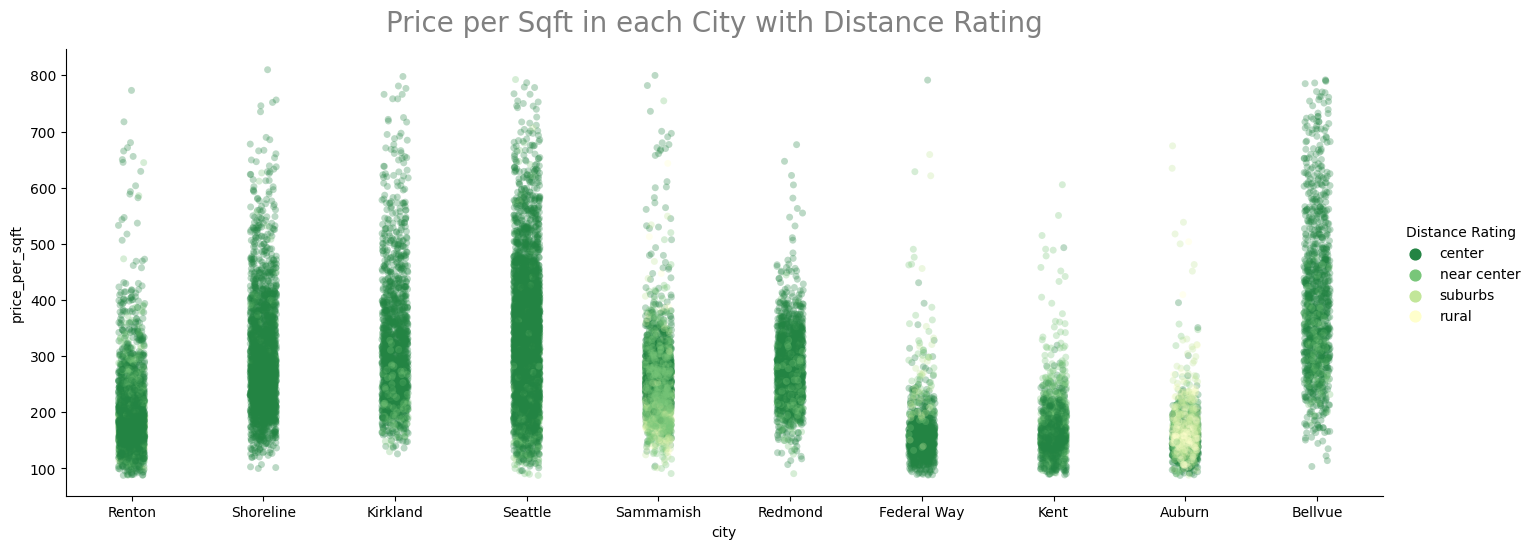

In [972]:
# To create custom color palette: Create an array with the colors: 
colors = ['#238443','#78c679','#c2e699','#ffffcc']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

my_plot = sns.catplot(
    # you can use query on the data frame
    data=df,
    # set x and y axes, and a third categorical variable to display in color
    x='city', y='price_per_sqft', hue='distance_rating', 
    # the catplot has the option to add jitter to data points to keep them from overlapping as they would in the scatterplot,
    # default is True
    jitter=True, 
    # chose a color palette
    palette=customPalette,
    # by default, the legend is True, but was not to my taste :)
    legend=False,
    alpha=0.3
    )

# set figure size:
my_plot.fig.set_size_inches(15,5)

# set title 
my_plot.fig.suptitle('Price per Sqft in each City with Distance Rating', y=(1.05), size=20, color='grey')

# add a nicer legend with more options:
my_plot.add_legend(title='Distance Rating')

# show the graph
plt.show(my_plot)

    


In [973]:
# calculate correlation for each city for distance_to_center and price_per_sqft
correlations = {}
for city in cities:
    city_series = df['city'] == city
    city_df = df[city_series]
    correlations[city] = city_df[['distance_to_center', 'price_per_sqft']].corr()
print(correlations)

{'Seattle':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.267         
price_per_sqft     -0.267              1.000          , 'Bellvue':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.580         
price_per_sqft     -0.580              1.000          , 'Kent':                     distance_to_center  price_per_sqft
distance_to_center 1.000               0.268          
price_per_sqft     0.268               1.000          , 'Renton':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.136         
price_per_sqft     -0.136              1.000          , 'Federal Way':                     distance_to_center  price_per_sqft
distance_to_center 1.000               0.521          
price_per_sqft     0.521               1.000          , 'Kirkland':                     distance_to_center  price_per_sqft
distance_to_center 1.000               -0.442  

##### Findings so far:

In Shoreline, Kirkland, Seattle, Redmond and Bellvue the price per sqft will rise the nearer to the center the houses are. 
In this data visualisation all houses are included (small or big, few or many bedrooms).
It would be interesting to look, how and if the scatterplot will change when we filter for big houses with few bedrooms. These are our targeted houses. 

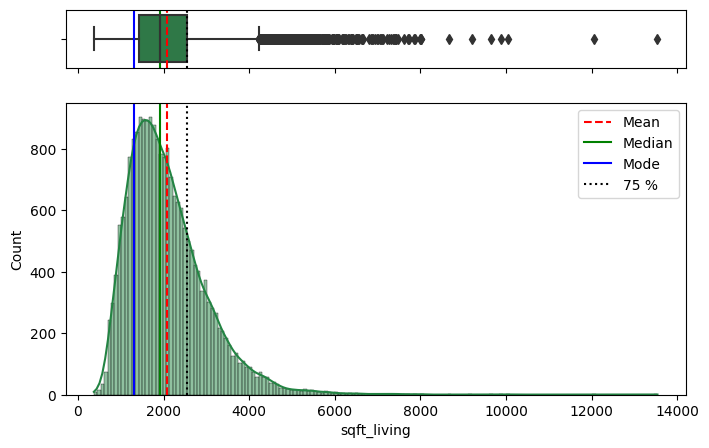

In [974]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['sqft_living'].mean()
median=df['sqft_living'].median()
mode=df['sqft_living'].mode().values[0]
cutoff=df['sqft_living'].quantile(0.75)

sns.boxplot(data=df, x="sqft_living", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="sqft_living", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

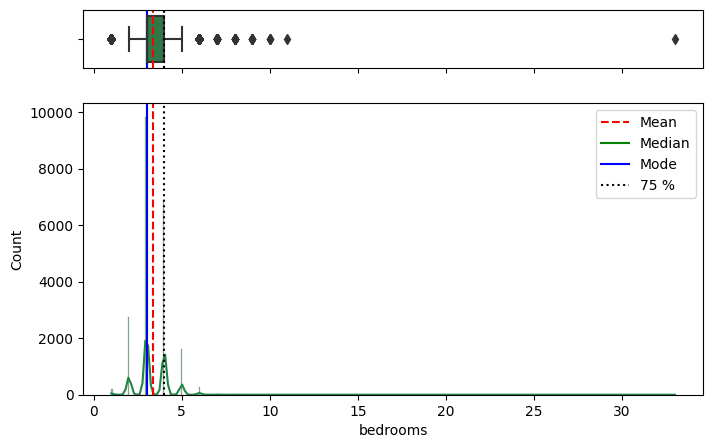

In [975]:
# Boxplot and Histogram for 'sqft_living' with mean, median and mode displayed:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['bedrooms'].mean()
median=df['bedrooms'].median()
mode=df['bedrooms'].mode().values[0]
cutoff=df['bedrooms'].quantile(0.75)

sns.boxplot(data=df, x="bedrooms", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
ax_box.axvline(cutoff, color='black', linestyle=':')

sns.histplot(data=df, x="bedrooms", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.axvline(cutoff, color='black', linestyle=':', label="75 %")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

In [976]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  zipcode    lat  \
0  10/13/2014 221900.000  3        1.000       1180         98178   47.511   
1  6/23/2014  205425.000  2        1.000       880          98178   47.501   
2  7/17/2014  445000.000  3        2.250       2100         98178   47.509   
3  9/25/2014  236000.000  3        1.000       1300         98178   47.505   
4  2/27/2015  170000.000  2        1.000       860          98178   47.505   

      long  sqft_living15  sqft_lot15  price_per_sqft  price_below_median  \
0 -122.257  1340           5650       188.051          True                 
1 -122.248  1190           6780       233.438          True                 
2 -122.244  2660           8712       211.905          True                 
3 -122.255  1320           7619       181.538          True                 
4 -122.272  1650           8775       197.674          True                 

   zip_price_median    city  distance_to_center distance_rating  
0 176.623            Renton 6.232                center          
1 176.623            Renton 4.735                center          
2 176.623            Renton 5.040                center          
3 176.623            Renton 5.649                center          
4 176.623            Renton 7.222                center

In [977]:
df.describe()

price  bedrooms  bathrooms  sqft_living   zipcode       lat  \
count 21597.000   21597.000 21597.000  21597.000    21597.000 21597.000   
mean  540296.574  3.373     2.116      2080.322     98077.952 47.560      
std   367368.140  0.926     0.769      918.106      53.513    0.139       
min   78000.000   1.000     0.500      370.000      98001.000 47.156      
25%   322000.000  3.000     1.750      1430.000     98033.000 47.471      
50%   450000.000  3.000     2.250      1910.000     98065.000 47.572      
75%   645000.000  4.000     2.500      2550.000     98118.000 47.678      
max   7700000.000 33.000    8.000      13540.000    98199.000 47.778      

           long  sqft_living15  sqft_lot15  price_per_sqft  zip_price_median  \
count 21597.000 21597.000      21597.000   21597.000       21597.000           
mean  -122.214  1986.620       12758.284   264.143         253.793             
std   0.141     685.230        27274.442   110.000         79.015              
min   -122.519  399.000        651.000     87.588          144.970             
25%   -122.328  1490.000       5100.000    182.292         181.423             
50%   -122.231  1840.000       7620.000    244.645         250.830             
75%   -122.125  2360.000       10083.000   318.333         302.632             
max   -121.315  6210.000       871200.000  810.139         565.166             

       distance_to_center  
count 21597.000            
mean  8.475                
std   6.239                
min   0.143                
25%   4.952                
50%   7.012                
75%   9.361                
max   81.317

In [978]:
# Make series with rows with 3 and less bedrooms:
bedrooms_series = df['bedrooms'] <= df['bedrooms'].mode()
bedrooms_series.name = 'few_bedrooms'

# Make series with rows where sqft_living is above the mode:
sqft_living_series = df['sqft_living'] >= df['sqft_living'].mode()
sqft_living_series.name = 'sqft_living_big'

# = pd.concat([df, price_per_sqft_series], axis=1)
#df.head()

ValueError: Can only compare identically-labeled Series objects

In [ ]:
#plt.scatter(df['distance_to_center'], df['price_per_sqft'], alpha=0.2)

#plt.xlabel('Distance to City Center (km)')
#plt.ylabel('Price per Sqft (US $)')
#plt.title('Distance to City Center vs. Price per Sqft')

#plt.show();

In [ ]:
#df.query('city == "Shoreline"').plot(kind='scatter', x='distance_to_center', y='price_per_sqft', alpha=0.2);
